In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import my_functions as mf
from matplotlib.colors import LogNorm
from matplotlib import cm
from scipy.ndimage import gaussian_filter

In [2]:
%matplotlib inline

In [3]:
xmin = 0.
xmax = 30.
xn = 31
x = np.linspace(xmin,xmax,xn)

ymin = 0.
ymax = 30.
yn = 31
y = np.linspace(ymin,ymax,yn)

zmin = 0
zmax = 30
zn =  31
z = np.linspace(zmin,zmax,zn)

X,Y,Z = np.meshgrid(x,y,z)
rho_m = np.ones((xn,yn,zn))*200.
rho_m[:,:,10:] = 1000.
rho_m[10:20,10:20,5:15] = 1.


In [4]:
xx,yy,zz,x1,y1,z1,rho = mf.select_area(0,30,0,30,0,30,x,y,z,rho_m)

In [5]:
rho1 = np.ravel(rho)
lx,ly,lz = rho.shape
print lx,ly,lz

30 30 30


In [6]:
rho_sm = gaussian_filter(rho, sigma=1.5)
rho_sm1 = np.ravel(rho_sm)

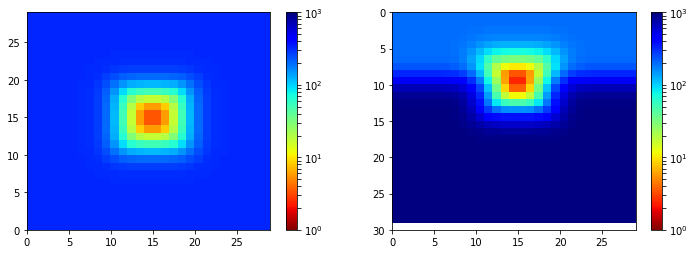

In [7]:
cmap = plt.cm.jet
cmap_r = mf.reverse_colourmap(cmap)

mx,my = np.meshgrid(y1,x1)
mx1,my1 = np.meshgrid(z1,y1)

cmap = plt.cm.jet
cmap_r = mf.reverse_colourmap(cmap)

z_plot = np.argmin(np.abs(z1-8))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.pcolor(mx,my,rho_sm[:,:,z_plot],cmap=cmap_r,norm = LogNorm(vmin=1, vmax=1000))
plt.colorbar()

plt.subplot(1,2,2)
plt.pcolor(my1,mx1,rho_sm[15,:,:],cmap=cmap_r,norm = LogNorm(vmin=1, vmax=1000))
plt.ylim(30,0)
plt.colorbar()
plt.show()

In [8]:
# Control points

index_x1 = np.arange(0,10,4)
index_x2 = np.arange(20,len(x),4)
index_y1 = np.arange(0,10,4)
index_y2 = np.arange(20,len(y),4)
index_z1 = np.arange(0,5,2)
index_z2 = np.arange(15,len(z),4)

index_xst = np.arange(10,20,1)
index_yst = np.arange(10,20,1)
index_zst = np.arange(5,15,1)

c1 = np.array([])
c1 = np.hstack((x[index_x1],x[index_xst],x[index_x2]))
c2 = np.array([])
c2 = np.hstack((y[index_y1],y[index_yst],y[index_y2]))
c3 = np.array([])
c3 = np.hstack((z[index_z1],z[index_zst],z[index_z2]))

X,Y,Z = np.meshgrid(c1,c2,c3)

xc = np.ravel(X)+.01
yc = np.ravel(Y)+.01
zc = np.ravel(Z)+.01

ln = xc.size

In [9]:
xc.size,yc.size,zc.size

(4352, 4352, 4352)

In [10]:
# Interpolation points

xi = np.copy(x1)
yi = np.copy(y1)
zi = np.copy(z1)
#z0 = np.sort(np.concatenate((z,z/2)))

x0n = len(xi)
y0n = len(yi)
z0n = len(zi)

mx0,my0 = np.meshgrid(yi,xi)
mx01,my01 = np.meshgrid(zi,yi)
X0,Y0,Z0 = np.meshgrid(xi,yi,zi)

x0 = np.ravel(X0)
y0 = np.ravel(Y0)
z0 = np.ravel(Z0)

In [11]:
# Calculate interpolation function
t = 0.2
A = mf.calc_A_by_column(xx,yy,zz,xc,yc,zc,2,t)

In [12]:
H = np.dot(A.T,A)

In [13]:
h0 = np.trace(H)/ln

In [14]:
mu = 1E-8*h0

print mu

5.182910033945912e-05


In [15]:
p = np.linalg.solve(H+(mu*np.identity(ln)),np.dot(A.T,rho_sm1))

In [16]:
rho_p = np.dot(A,p)
rho_p = rho_p.reshape((lx,ly,lz))
rho_p.shape

(30, 30, 30)

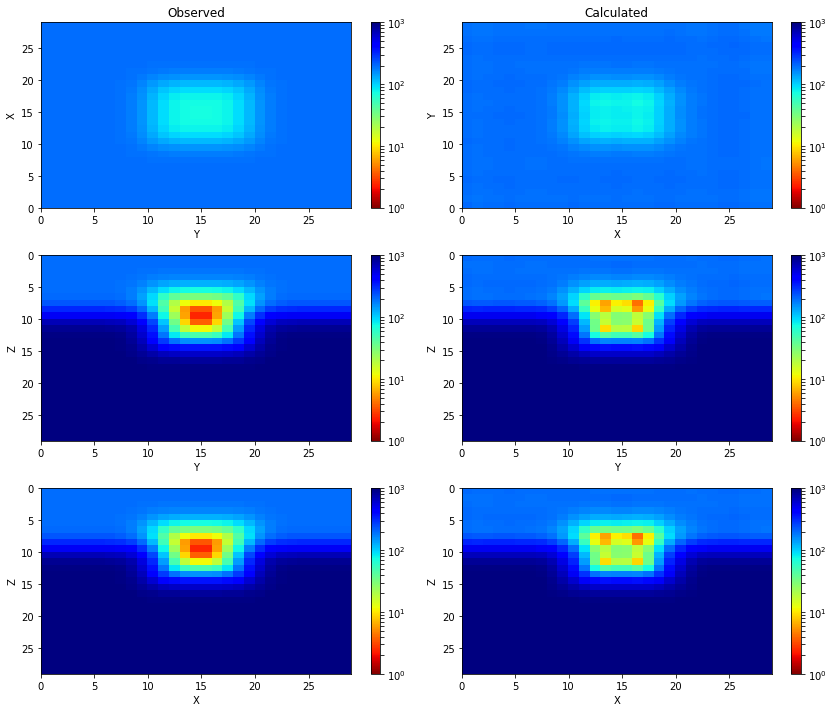

In [17]:
mf.plot_models_6sub(15,15,5,x1,y1,z1,x1,y1,z1,rho_sm,rho_p)

In [18]:
np.linalg.norm(rho_sm - rho_p)

1000.1109301498823

In [19]:
# Interpolate funtion rho in points x0, y0, z0

A0 = mf.calc_A_by_column(x0,y0,z0,xc,yc,zc,2,t)

In [20]:
# Interpolated matrix
rho0 = np.dot(A0,p)
rho0_m = rho0.reshape((x0n,y0n,z0n))

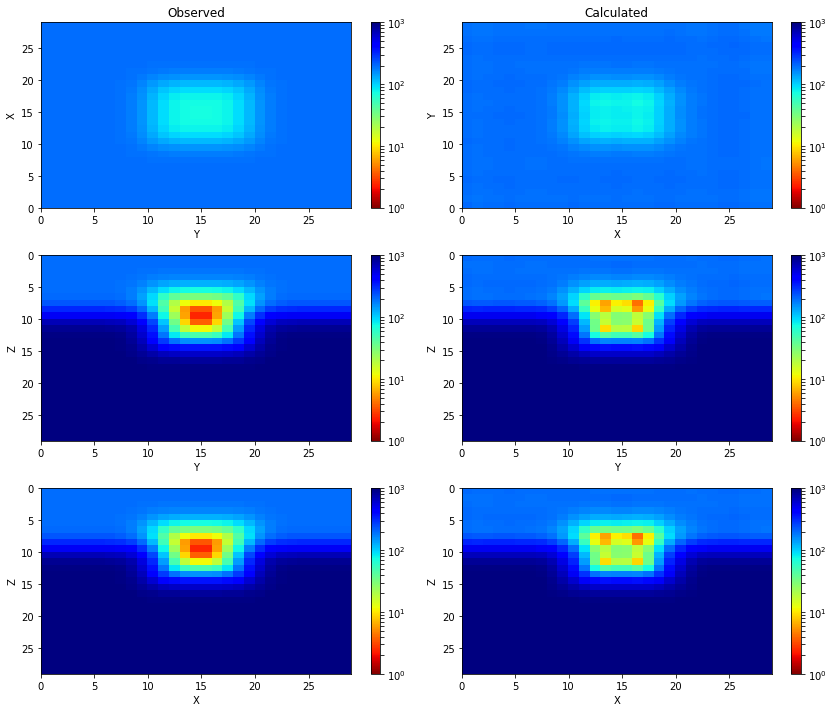

In [21]:
mf.plot_models_6sub(15,15,5,x1,y1,z1,xi,yi,zi,rho_sm,rho0_m)